In [1]:
# Add a command to produce plots directly below cells.
%matplotlib inline
# Import required packages
import numpy as np
import os
# Import xarray and glob for data analysis.
import xarray as xr
from glob import glob
# Dask for processing
import dask as da

os.chdir("/home/561/gp8431")
from climate import StandardGrid
from climate import Projection

import matplotlib.pyplot as plt

# Change working directory.
os.chdir("/scratch/w40/gp8431/run")

In [2]:
# Extract era data
files = glob('/g/data/rt52/era5/single-levels/monthly-averaged/sst/*/*')
files.sort()

In [3]:
era_all_SST = xr.open_mfdataset(files, combine='by_coords').sst #.rename({"t":"temp"})
#era_clim_SST = era_all_SST.groupby('time.month').mean('time')
era_clim_SST = era_all_SST.groupby('time.month').mean()
#era_clim_SST_lon = era_clim_SST.mean('longitude')

In [5]:
# Compute temperature/longitude anomaly in era data and adjust data.

# Adjust the data to OND.
era_anom_SST = era_all_SST.sel(time=slice('2019-01-01','2019-12-31')).groupby('time.month')-era_clim_SST

era_anom_SST = era_anom_SST - era_anom_SST.mean('longitude')

era_anom_SST = era_anom_SST.rename({"latitude":"lat", "longitude":"lon"})

era_anom_SST = StandardGrid(era_anom_SST, lon_name='lon', lat_name='lat')

era_anom_oct_SST = era_anom_SST.sel(time=slice('2019-10-01','2019-10-31'))

era_anom_OND_SST = era_anom_SST.sel(time=slice('2019-10-01','2019-12-31')).mean('time')

#era_anom['lon'] = (era_anom['lon'] + 180.0)

In [7]:
# Define figures to add subplots to.
fig_era_SST = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

In [8]:
#era_anom_oct_SST_trop = era_anom_oct_SST.sel(lat=slice(-90.0, 30.0))
#ax_era_SST = fig_era_SST.add_subplot(1, 1, 1)
##cax_era_lon_p = ax_era_lon_p.pcolormesh(era_temp_anom_lon_p.lon, era_temp_anom_lon_p.pfull, era_temp_anom_lon_p.squeeze().values, vmin=-5, vmax=5)
#era_anom_oct_SST_trop.plot(ax=ax_era_SST)
#ax_era_SST.set(title = 'era_SST')
##cbar_era = fig_era.colorbar(cax_era)
#fig_era_SST.savefig('/home/561/gp8431/fig_era_SST.png')

In [9]:
#fig_era_SST

In [10]:
fig_era_SST_OND = plt.figure(figsize=(16,16))

<Figure size 1152x1152 with 0 Axes>

In [11]:
era_anom_OND_SST = era_anom_OND_SST.sel(lat=slice(-90.0, 30.0))
ax_era_OND_SST = fig_era_SST_OND.add_subplot(1, 1, 1)
#cax_era_lon_p = ax_era_lon_p.pcolormesh(era_temp_anom_lon_p.lon, era_temp_anom_lon_p.pfull, era_temp_anom_lon_p.squeeze().values, vmin=-5, vmax=5)
era_anom_OND_SST.plot(ax=ax_era_OND_SST)
ax_era_OND_SST.set(title = 'era_OND_SST')
#cbar_era = fig_era.colorbar(cax_era)
fig_era_SST_OND.savefig('/home/561/gp8431/fig_era_SST_OND.png')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [12]:
#fig_era_SST_OND, ax_era_OND_SST = Projection()
#ax_era_OND_SST.contourf(era_anom_OND_SST.lon,era_anom_OND_SST.lat,era_anom_OND_SST.values)

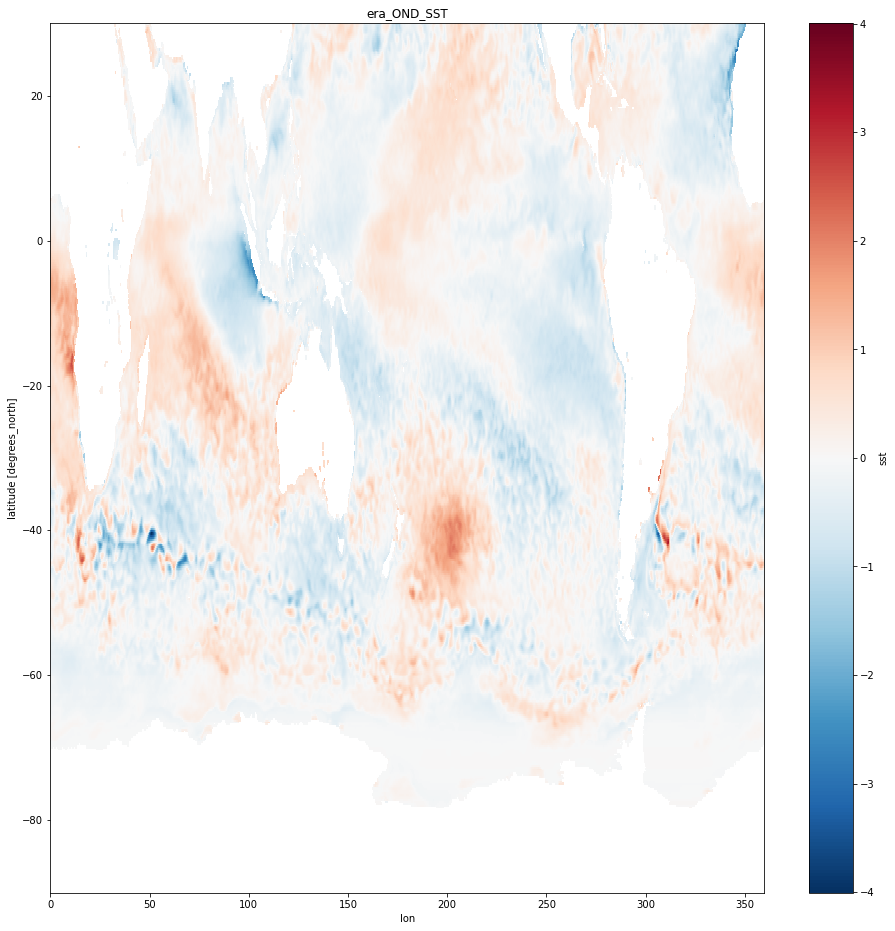

In [13]:
fig_era_SST_OND

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.07/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


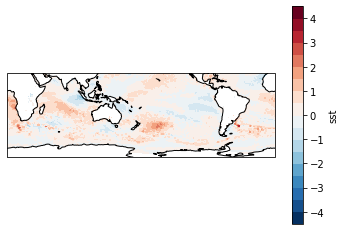

In [14]:
fig_proj_OND_SST, ax, trans = Projection('PlateCarree', coast=True, kw_args={'central_longitude': 180})#fig_proj,ax = Projection()
era_anom_OND_SST.squeeze().plot.contourf(ax=ax, cmap='RdBu_r', levels=21, **trans)
fig_proj_OND_SST.savefig('/home/561/gp8431/fig_proj_OND_SST.png')